In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

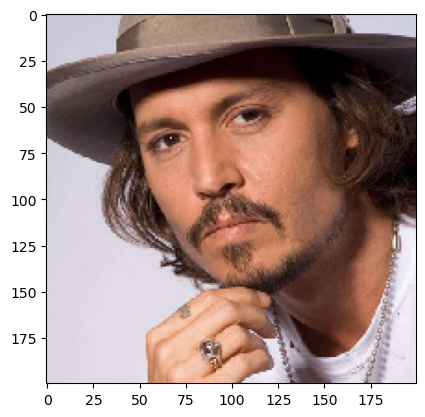

In [2]:
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import Image
import os
import cv2 

file1 = r"Images\Johnny Depp\004_18e08ab4.jpg"
test_image = image.load_img(file1, target_size = (200, 200))

plt.imshow(test_image)

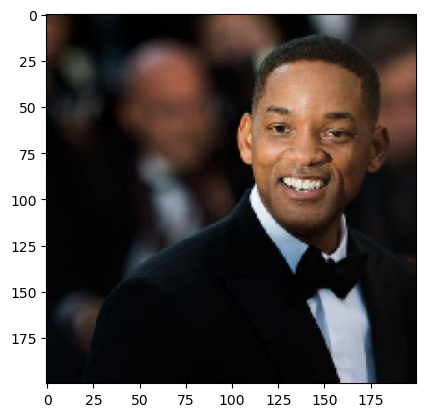

In [3]:
file2 = r"Images\Will Smith\033_241ed413.jpg"
test_image = image.load_img(file2, target_size = (200, 200))

plt.imshow(test_image)

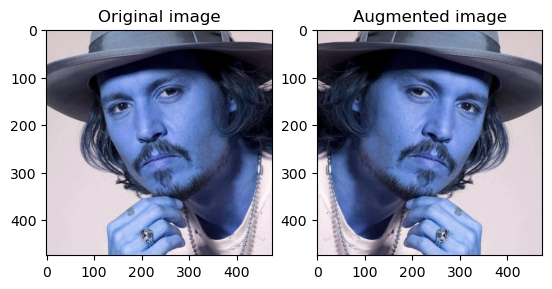

In [4]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)



image = cv2.imread(file1)

flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

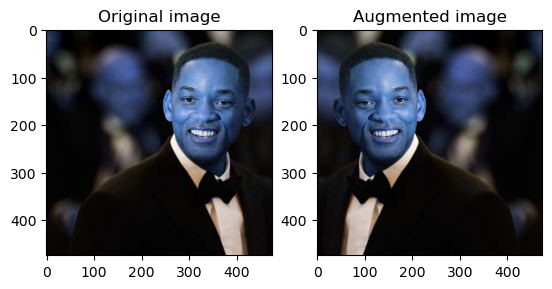

In [5]:
image = cv2.imread(file2)

flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

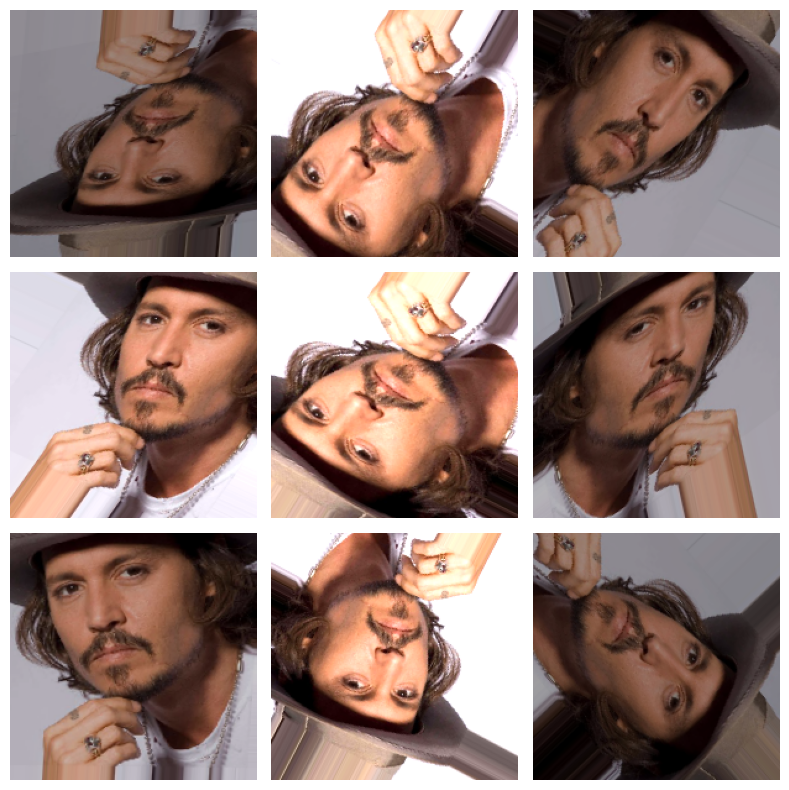

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np

# Base image
img = load_img(file1, target_size=(200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)  # shape (1, 200, 200, 3)

# Define augmentations similar to what you had
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=50,
    shear_range=40,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.5, 1.5]
)

# Generate a few augmented samples
aug_iter = datagen.flow(x, batch_size=1)

images = []
for i in range(9):
    batch = next(aug_iter)
    images.append(batch[0].astype("float32") / 255.0)

# Plot them
plt.figure(figsize=(8, 8))
for i, img_aug in enumerate(images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_aug)
    plt.axis("off")
plt.tight_layout()
plt.show()

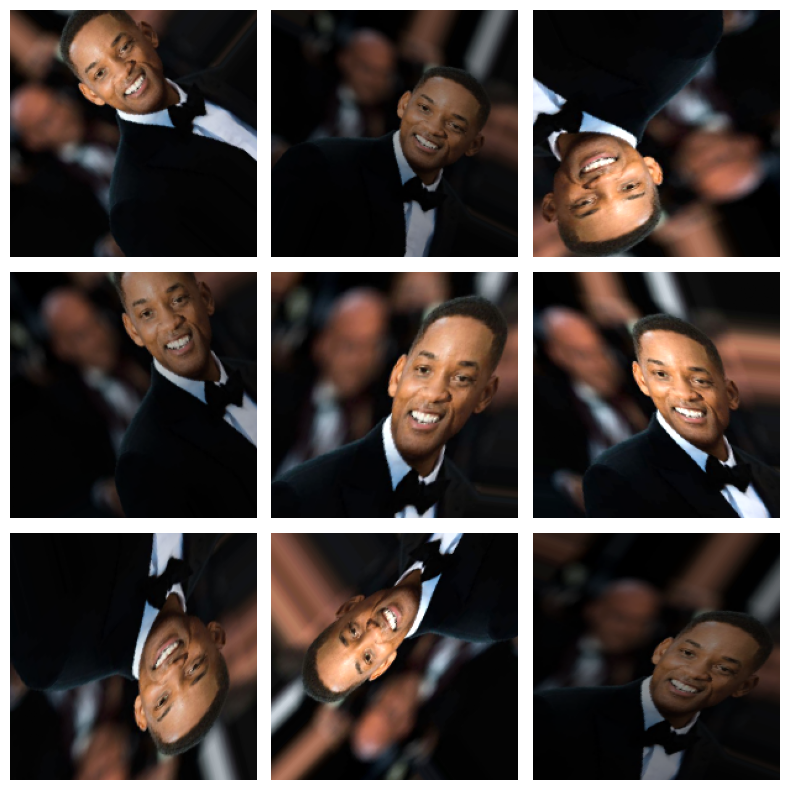

In [7]:
img = load_img(file2, target_size=(200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)  # shape (1, 200, 200, 3)

# Define augmentations similar to what you had
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=50,
    shear_range=40,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.5, 1.5]
)

# Generate a few augmented samples
aug_iter = datagen.flow(x, batch_size=1)

images = []
for i in range(9):
    batch = next(aug_iter)
    images.append(batch[0].astype("float32") / 255.0)

# Plot them
plt.figure(figsize=(8, 8))
for i, img_aug in enumerate(images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_aug)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [8]:
data_dir = 'Images'

In [9]:
img_width, img_height = 224, 224
batch_size = 16
num_epochs = 30

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    validation_split=0.2
)

In [11]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)
print(train_generator.class_indices)

Found 160 images belonging to 2 classes.
{'Johnny Depp': 0, 'Will Smith': 1}


In [12]:
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

print(validation_generator.class_indices)

Found 40 images belonging to 2 classes.
{'Johnny Depp': 0, 'Will Smith': 1}


In [13]:
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

In [15]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') 
])

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator,
    callbacks=[early_stop]
)

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 782ms/step - accuracy: 0.5750 - loss: 0.7413 - val_accuracy: 0.5000 - val_loss: 0.6912
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 644ms/step - accuracy: 0.5375 - loss: 0.7397 - val_accuracy: 0.5000 - val_loss: 0.6863
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 661ms/step - accuracy: 0.5500 - loss: 0.7125 - val_accuracy: 0.5000 - val_loss: 0.6960
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 656ms/step - accuracy: 0.5813 - loss: 0.6771 - val_accuracy: 0.4500 - val_loss: 0.6990
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 642ms/step - accuracy: 0.6125 - loss: 0.6566 - val_accuracy: 0.5250 - val_loss: 0.6816
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 658ms/step - accuracy: 0.6375 - loss: 0.6312 - val_accuracy: 0.5250 - val_loss: 0.6821
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 647ms/step - accuracy: 0.6313 - loss: 0.6306 - val_accuracy: 0.5500 - val_loss: 0.6804
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 778ms/step - accuracy: 0.6500 - loss: 0.6561 - val_accuracy: 0

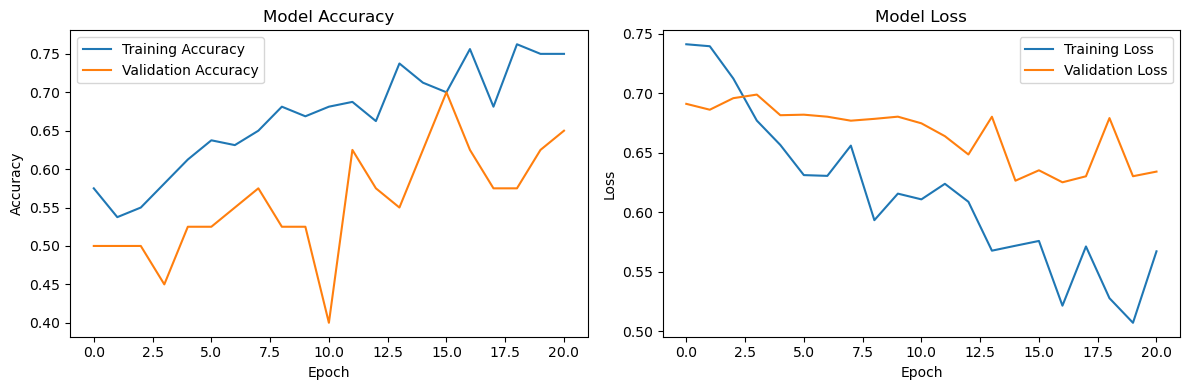

In [18]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get predictions on validation set
validation_generator.reset()
preds = model.predict(validation_generator)
y_pred = (preds > 0.5).astype('int32').ravel()

y_true = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

print("Classes:", class_labels)
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=class_labels))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step
Classes: ['Johnny Depp', 'Will Smith']
[[16  4]
 [13  7]]
              precision    recall  f1-score   support

 Johnny Depp       0.55      0.80      0.65        20
  Will Smith       0.64      0.35      0.45        20

    accuracy                           0.57        40
   macro avg       0.59      0.57      0.55        40
weighted avg       0.59      0.57      0.55        40



In [19]:
from tensorflow.keras.preprocessing import image as keras_image

In [20]:
example_path = os.path.join(data_dir, 'Johnny Depp', os.listdir(os.path.join(data_dir, 'Johnny Depp'))[0])
img = keras_image.load_img(example_path, target_size=(img_width, img_height))
img_array = keras_image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [21]:
prediction = model.predict(img_array)[0][0]
class_indices = train_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


In [22]:
print(f'Predicted label: {index_to_class[int(prediction > 0.5)]}')

Predicted label: Johnny Depp


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
This is Johnny Depp:


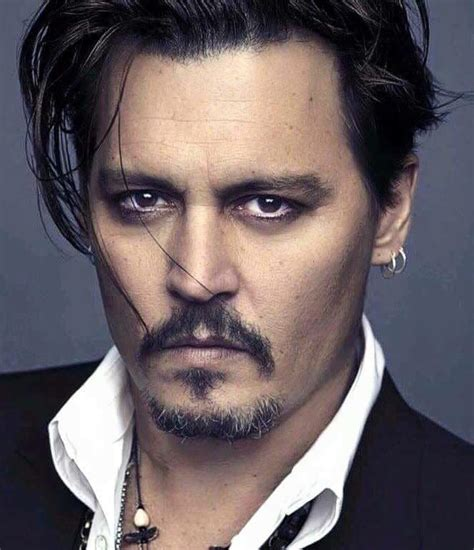

In [24]:
# MAKING PREDICTIONS:
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import Image
import os
import cv2 

file = r"Images\Johnny Depp\032_4b3ee537.jpg"
test_image = image.load_img(file, target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)

train_generator.class_indices
if result[0][0] == 0:
    prediction = 'This is Johnny Depp:'
else:
    prediction = 'This is not Johnny Depp:'


print(prediction)
img = Image(file, width = "400", height = "400")
display(img)
print("\n")
print("\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
This is Will Smith:


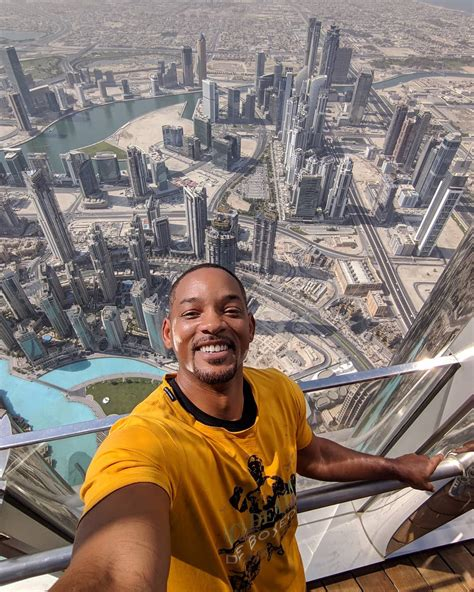

In [26]:
file_w = r"Images\Will Smith\051_1f3aede9.jpg"
test_image = image.load_img(file_w, target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)

train_generator.class_indices
if result[0][0] == 1:
    prediction = 'This is Will Smith:'
else:
    prediction = 'This is not Will Smith:'


print(prediction)
img = Image(file_w, width = "400", height = "400")
display(img)
print("\n")
print("\n")